In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def convert_to_float(n):
  try:
    return float(n)
  except ValueError:
    return None
  
def removeOutliers(x, outlierConstant=1):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return result.tolist()

In [24]:
data_path = Path('data/')
KlekFP_set_path = data_path.joinpath('cardiotoxicity_hERG_KlekFP_ready_set.csv')
preprocessed_data_path = data_path.joinpath('preprocessed/')
results_path = Path('results/')

In [5]:
df = pd.read_csv(KlekFP_set_path, header=0, index_col=False)

D:\Python 3.9\lib\site-packages\IPython\core\interactiveshell.py:3012: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df

,IC50,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,645.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6700.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11499,6600.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11500,100000.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11501,30000.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11502,26000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
print(f"Number of columns: {len(nunique)} \nRemoved Columns: {len(cols_to_drop)}")
df = df.drop(cols_to_drop, axis=1)
print(f"Number of columns after removal: {len(df.nunique())}")

Number of columns: 4861 
Removed Columns: 2722
Number of columns after removal: 2139


In [8]:
df["IC50"] = df["IC50"].apply(convert_to_float)
df = df.dropna()
df.loc[1:] = df.loc[1:].astype('int')
len(df)

10635

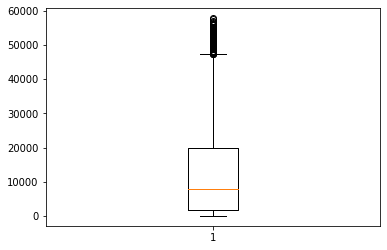

In [9]:
plt.boxplot(removeOutliers(df["IC50"]))
plt.show()

D:\Python 3.9\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

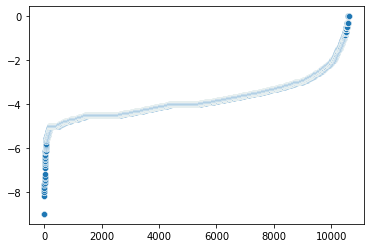

In [10]:
tmp = np.sort(-np.log10(df["IC50"]))
sns.scatterplot(data=tmp)

In [11]:
df['IC50'] = df['IC50'].apply(lambda x: 1 if x < 10000 else 0)

In [12]:
df["IC50"].value_counts()

0    5389
1    5246
Name: IC50, dtype: int64

<AxesSubplot:>

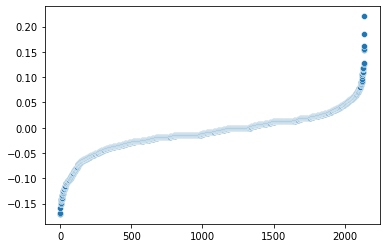

In [13]:
d = df
n_nontoxic0 = (d.groupby(['IC50']).count() - d.groupby(['IC50']).sum()).loc[0]
n_toxic0 = (d.groupby(['IC50']).count() - d.groupby(['IC50']).sum()).loc[1]
n_nontoxic1 = d.groupby(['IC50']).sum().loc[0]
n_toxic1 = d.groupby(['IC50']).sum().loc[1]


phi = ((n_toxic0 * n_toxic1) - (n_toxic0 * n_nontoxic1)) / np.sqrt((n_toxic1+n_toxic0) * (n_toxic1 + n_nontoxic1) * (n_nontoxic1 + n_nontoxic0) * (n_toxic0) + n_nontoxic0)
sns.scatterplot(data=np.sort(phi))

In [21]:
columns_to_be_removed = phi.where(phi.between(-0.02, 0.02)).dropna().index
print(f"Number of columns to be removed: {len(columns_to_be_removed)}")
df = df.drop(columns=columns_to_be_removed)

Number of columns to be removed: 1088


In [22]:
df

,IC50,KRFP2,KRFP8,KRFP10,KRFP13,KRFP14,KRFP16,KRFP17,KRFP18,KRFP20,...,KRFP4830,KRFP4831,KRFP4832,KRFP4833,KRFP4835,KRFP4852,KRFP4853,KRFP4856,KRFP4857,KRFP4858
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11499,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11500,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11501,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11502,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.to_csv(preprocessed_data_path.joinpath(f"KlekFP_preprocessed.csv"), encoding='utf-8', header=True, index_label=False)